In [1]:
library(Hmisc)
library(lubridate)
library(hrbrthemes)
library(viridis)
library(tidyverse)
library(reshape2)
library(survey)
library(networkD3)

Warning message:
"package 'Hmisc' was built under R version 4.1.3"
Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Warning message:
"package 'hrbrthemes' was built under R version 4.1.3"
Loading required package: viridisLite

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x lubridate::as.difftime() masks base::as.difftime()
x lubridate::date(

In [2]:
# read file and add under weight

full <- read_csv("C:\\Users\\Elena.Mariani\\Documents\\Projects\\ahl_weight_loss_modelling\\Output\\hse_full_weight_loss_3_steps.csv") %>% 
  mutate(BMI_class = case_when(BMI_est <= 18.5 ~ "underweight",
                               BMI_est > 18.5 & BMI_est < 25 ~ "normal",
                               BMI_est >= 25 & BMI_est < 30 ~ "overweight",
                               BMI_est >= 30 ~ "obese",
                               TRUE ~ "NA")) %>% 
  mutate(final_BMI_class = case_when(bmi_final <= 18.5 ~ "underweight",
                                     bmi_final > 18.5 & bmi_final < 25 ~ "normal",
                                     bmi_final >= 25 & bmi_final < 30 ~ "overweight",
                                     bmi_final >= 30 ~ "obese",
                                     TRUE ~ "NA"))

Rows: 22860 Columns: 40

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (7): sex, BMI_class, Sex, Age_group, Ethnicity, Sex_letter, final_BMI_c...
dbl (32): X, time, f, FFM, finalWeight, startWeight, height, age, baseIntake...
lgl  (1): thisMin


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [3]:
merge(  full  %>% 
mutate(time_period = paste0("starting", time_period))  %>% 
group_by(time_period, BMI_class, sex) %>% 
  summarise(intakeM = wtd.mean(baseIntake, weight = sample_weight)) %>% 
  dcast(., BMI_class + sex ~ time_period),
      full  %>% 
mutate(time_period = paste0("ending", time_period))  %>% 
group_by(time_period, BMI_class, sex) %>% 
  summarise(intakeM = wtd.mean(intake_final, weight = sample_weight)) %>% 
  dcast(., BMI_class + sex ~ time_period))  %>% 
mutate(diff = ending3 - starting1,
      perc = diff/starting1*100)  %>% 
arrange(sex)


`summarise()` has grouped output by 'time_period', 'BMI_class'. You can override using the `.groups` argument.

Using intakeM as value column: use value.var to override.

`summarise()` has grouped output by 'time_period', 'BMI_class'. You can override using the `.groups` argument.

Using intakeM as value column: use value.var to override.



BMI_class,sex,starting1,starting2,starting3,ending1,ending2,ending3,diff,perc
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
normal,F,2180.150,2041.155,1963.691,2041.155,1963.691,1908.988,-271.1622,-12.43778
obese,F,2580.496,2367.760,2236.281,2367.760,2236.281,2163.870,-416.6260,-16.14519
overweight,F,2328.541,2148.998,2037.741,2148.998,2037.741,1966.450,-362.0912,-15.55013
normal,M,2722.828,2556.606,2470.551,2556.606,2470.551,2413.657,-309.1711,-11.35478
obese,M,3452.858,3169.688,2936.921,3169.688,2936.921,2771.386,-681.4720,-19.73646
overweight,M,3073.419,2814.751,2634.742,2814.751,2634.742,2521.001,-552.4182,-17.97406


In [24]:
names(full)

[1] "X"               "time"            "f"               "FFM"            
 [5] "finalWeight"     "startWeight"     "sex"             "height"         
 [9] "age"             "baseIntake"      "newIntake"       "RMR"            
[13] "PA"              "SPA"             "DIT"             "EExp"           
[17] "diff"            "thisMin"         "cum"             "TEE_final"      
[21] "weight_final"    "intake_final"    "day_final"       "bmi_final"      
[25] "time_period"     "BMI_class"       "Sex"             "Age_group"      
[29] "Age_est"         "Ethnicity"       "sample_weight"   "BMI_est"        
[33] "Wt_est"          "Ht_est"          "IMD_q"           "Sex_letter"     
[37] "value"           "target"          "final_BMI_class" "calRed"

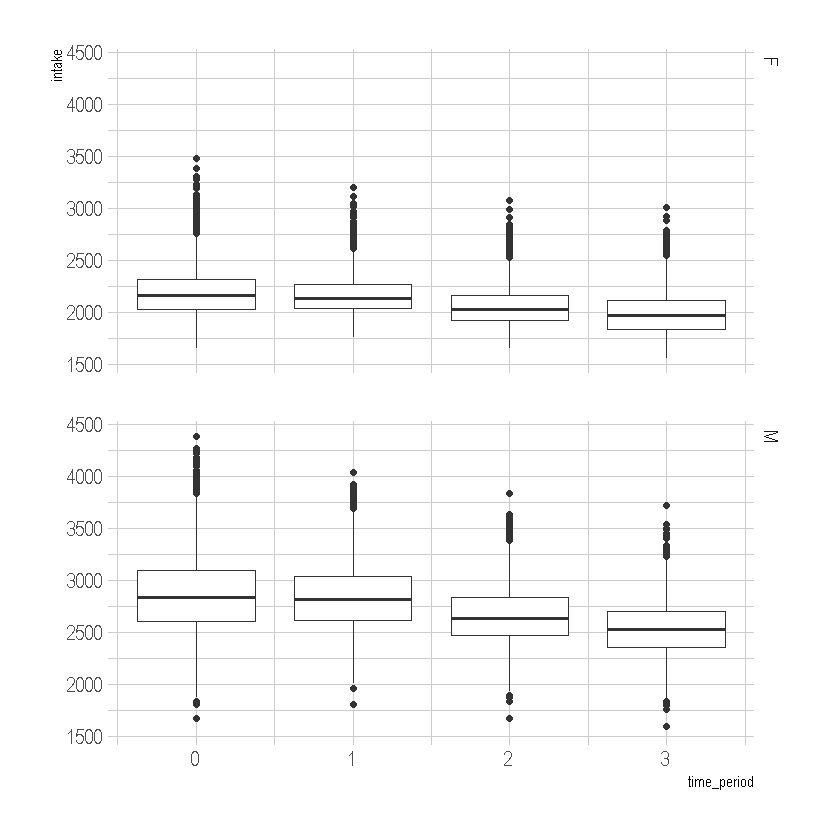

In [33]:
rbind(full  %>% 
      select(sex, X, baseIntake, sample_weight)  %>% 
      unique()  %>% 
      rename(intake = baseIntake)  %>% 
      mutate(time_period = 0), 
      full  %>% 
      select(sex, X, intake_final, time_period, sample_weight)  %>% 
      rename(intake = intake_final))  %>% 
ggplot(., aes(x = time_period, y = intake, group = time_period)) + 
facet_grid(sex ~.) +
geom_boxplot() +
theme_ipsum()
